# Data Retrieval and filtering

In [4]:
import pandas as pd


pd.set_option("display.max_rows", 500) # to display more rows in pandas DataFrames
pd.set_option("display.max_columns", 500)

In [5]:
from my_module import load_TAP_data, clean_data
from astroquery.utils.tap.core import TapPlus  # library to query astronomical databases, TAP services

df = load_TAP_data("http://tap.roe.ac.uk/ssa")
df_filtered = clean_data(df)


In [8]:
df_filtered.head()

,specobjid,objid,ra,dec,p_el_debiased,p_cs_debiased,spiral,elliptical,petroR50_r,petroR90_r,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,extinction_u,extinction_g,extinction_r,extinction_i,extinction_z
dr7objid,,,,,,,,,,,,,,,,,,,,
587724197201510613,470683366149089280,1237649918426415308,9.228958,13.894305,0.047,0.953,1,0,2.741955,6.363971,20.060163,18.611530,17.559286,17.019993,16.636461,0.312308,0.229793,0.166665,0.126377,0.089603
587724197202493564,471775455989491712,1237649918427398296,11.484458,13.812139,0.009,0.991,1,0,3.511922,7.065475,18.758015,17.559830,16.959278,16.575110,16.325520,0.401312,0.295282,0.214163,0.162393,0.115139
587724197203607681,472878816897820672,1237649918428512376,14.133875,13.698500,0.020,0.980,1,0,2.327382,7.055522,19.535625,17.923246,17.049698,16.570343,16.219820,0.358754,0.263968,0.191452,0.145172,0.102929
587724197740085400,472936541258278912,1237649918964990171,13.233209,14.169889,0.930,0.018,0,1,1.640008,4.498993,18.879148,17.071806,16.211632,16.047989,15.450515,0.316053,0.232549,0.168664,0.127893,0.090678
587724197740151092,472916200293165056,1237649918965055762,13.385917,14.069222,0.026,0.905,1,0,3.944560,7.731080,19.503391,18.208462,17.642393,17.308708,17.031727,0.343988,0.253103,0.183572,0.139197,0.098692


# Image cutout

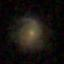

In [11]:
import urllib

from IPython.display import Image, display


IMAGE_PIXSCALE = 0.4  # arcsec/pixel
IMAGE_SIZE_PX = 64
IMAGE_WIDTH_PX = IMAGE_SIZE_PX
IMAGE_HEIGHT_PX = IMAGE_SIZE_PX
OBJECT_INDEX = 1 # which object from the filtered list to download

URL = (
    "https://skyserver.sdss.org/DR19/SkyserverWS/ImgCutout/getjpeg?"
    "ra={ra}&dec={dec}&scale={scale}&width={width}&height={height}"
)

RA = df_filtered.iloc[OBJECT_INDEX]["ra"]
DEC = df_filtered.iloc[OBJECT_INDEX]["dec"]


url = URL.format(ra=RA, dec=DEC, scale=IMAGE_PIXSCALE, width=IMAGE_WIDTH_PX, height=IMAGE_HEIGHT_PX)
response = urllib.request.urlopen(url)
blob = response.read()  # bytes of the image (JPEG)
display(Image(blob))

In [12]:
import urllib
from IPython.display import Image, display
from PIL import Image as PILImage
import pandas as pd

IMAGE_PIXSCALE = 0.4  # arcsec/pixel
IMAGE_SIZE_PX = 64
IMAGE_WIDTH_PX = IMAGE_SIZE_PX
IMAGE_HEIGHT_PX = IMAGE_SIZE_PX
OBJECT_INDEX = 1  # which object from the filtered list to download

URL = (
    "https://skyserver.sdss.org/DR19/SkyserverWS/ImgCutout/getjpeg?"
    "ra={ra}&dec={dec}&scale={scale}&width={width}&height={height}"
)

# Get RA and DEC for the object
RA = df_filtered.iloc[OBJECT_INDEX]["ra"]
DEC = df_filtered.iloc[OBJECT_INDEX]["dec"]
OBJID = df_filtered.iloc[OBJECT_INDEX]["objid"]

# Download the image
url = URL.format(ra=RA, dec=DEC, scale=IMAGE_PIXSCALE, width=IMAGE_WIDTH_PX, height=IMAGE_HEIGHT_PX)
response = urllib.request.urlopen(url)
blob = response.read()  # bytes of the image (JPEG)

# Display the image
display(Image(blob))

# Process the image with Pillow
image = PILImage.open(urllib.request.urlopen(url)).convert("L")  # Convert to grayscale
pixels = list(image.getdata())  # Flatten pixel data into a 1D list
pixel_columns = [f"pix_{i // IMAGE_WIDTH_PX + 1}_{i % IMAGE_WIDTH_PX + 1}" for i in range(len(pixels))]

# Create a DataFrame
df_pixels = pd.DataFrame([pixels], columns=pixel_columns)
df_pixels.insert(0, "objid", OBJID)  # Add objid as the first column

# Display the DataFrame
print(df_pixels)

ModuleNotFoundError: No module named 'PIL'

In [7]:
blob

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00`\x00`\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x00@\x00@\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca\xd2\xd3\xd4\xd5\xd6\